In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_dir = os.getcwd()+"/data"

In [3]:
trainDf= pd.read_csv(data_dir+"/train.csv",header=None)
trainDf[246] = trainDf[245].values
# trainDf[245] = np.square(trainDf[52])
trainDf[245] = np.ones(30000)
trainDf.head()

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,43.437500,75.562500,0.0,634.0,20.0,16.000000,44.562500,0.0,473.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,47.781250,93.750000,1.0,598.0,7.5,17.859375,56.875000,0.0,594.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,52.0
2,2.273438,4.984375,0.0,44.0,1.0,1.029297,3.003906,0.0,37.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,10.148438,32.406250,0.0,292.0,0.0,5.152344,20.453125,0.0,220.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.285156,8.414062,0.0,102.0,1.0,0.973633,4.722656,0.0,93.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
lamda = [2**i for i in range(20,40)]

In [82]:

# feature=[44,45,46,47,48,49,50,51,52,53,243,244,245]
lamda = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000,3000] 
len(lamda)
# featureReq=[ 52,  45,  44,  47,  46,  53, 234, 235, 233,   3, 232,  48, 230,
#             49, 231,  18,  51,   9,  12,  16,   5,   4, 240, 239,  50, 237,
#             10, 236,  21, 238, 202, 181, 132,  58, 106,  60, 137, 196, 183,
#            241,   1, 121, 216, 104,   8, 173,  98,  68, 203, 167,  11, 146,]

14

In [5]:
k = 10
features = trainDf.iloc[:,:-1].values
labels = trainDf.iloc[:,246].values
er=[]
hyperParam = lamda[0]
normError = np.inf
j=0;
print(features.shape,labels.shape)

(30000, 246) (30000,)


In [6]:

for l in lamda:
    j=j+1
    error=[]
    print(j)
    for i in range(0,k):
        X_test = features[int(i*30000/k):int((i+1)*30000/k)]
        Y_test = labels[int(i*30000/k):int((i+1)*30000/k)]
        X_train = np.concatenate((features[:int(i*30000/k)],features[int((i+1)*30000/k):]),axis=0)
        Y_train = np.concatenate((labels[:int(i*30000/k)],labels[int((i+1)*30000/k):]),axis=0)
    #     print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
        #     print(l*np.ones([246,246]))
        XtXinv = np.linalg.inv(np.matmul(X_train.transpose(),X_train)+l*np.eye(246))
        XtY = np.matmul(X_train.transpose(),Y_train)
        Wopt = np.matmul(XtXinv,XtY)
        #     print(Wopt.shape)
        Y_predicted = np.matmul(X_test,Wopt)
        diff = Y_predicted-Y_test
        normError = ((np.linalg.norm(diff)**2)/np.matmul(Y_test.T,Y_test))
        if(normError<lossmin):
            lossmin = normError
            hyperParam = l
        error.append(normError)
    er.append(error)

1


NameError: name 'lossmin' is not defined

In [85]:
np.square(Y_test)

array([33856.,     0.,     0., ...,   361.,     0.,     0.])

In [86]:
# np.sum(np.array(er[i]))/10
print(hyperParam,lossmin)

0.001 0.5106680768978934


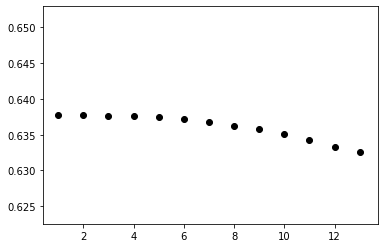

In [87]:
for i in range(1,len(lamda)):
    plt.scatter(i,np.mean(np.array(er[i])),color="black")
plt.show()


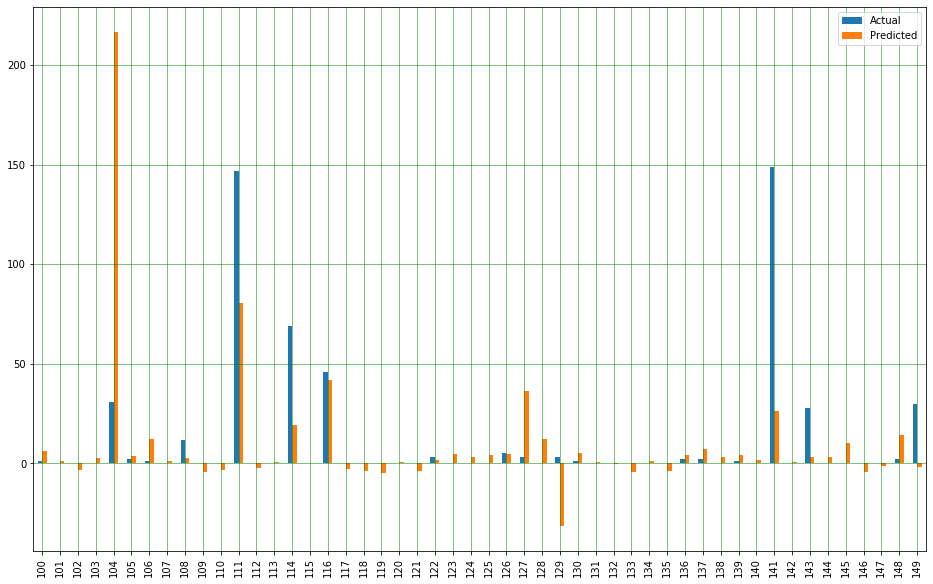

In [88]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predicted.flatten()})
df1 = df[100:150]
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
trainDf.iloc[:,247].values

In [ ]:
i=2
features[int(i*30000/k):int((i+1)*30000/k)].shape

In [ ]:
np.mean(np.square(Y_predicted-Y_test))

In [ ]:
Y_test

In [ ]:
Y_predicted

In [ ]:
abs(Y_predicted-Y_test)

In [ ]:
np.square(Y_predicted-Y_test)

In [ ]:
(np.linalg.norm(Y_predicted-Y_test)**2)/3000

In [ ]:
lamda[175:200]

In [ ]:
np.mean(np.array(er[13]))

In [ ]:
pd.DataFrame(er)

In [ ]:
plt.show()

In [ ]:
Y_predicted.tolist()

In [ ]:
Y_test.tolist()

In [ ]:
for r in range(0,100):
    x=r-1
    # r = 101
    X_train = trainDf.iloc[:20000,x:x+r].values
    # X_train = np.c_[X_train,np.ones(20000)]
    Y_train = trainDf.iloc[:20000,245].values
    X_test = trainDf.iloc[20000:,x:x+r].values
    # X_test = np.c_[X_test,np.ones(10000)]
    Y_test = trainDf.iloc[20000:,245].values
    # print(X_train[:,-1].tolist())
    # print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
    XtXinv = np.linalg.inv(np.matmul(X_train.transpose(),X_train))
    XtY = np.matmul(X_train.transpose(),Y_train)
    # print(XtXinv.shape,XtY.shape)
    Wopt = np.matmul(XtXinv,XtY)
    # print(Wopt.shape)
    Y_predicted = np.matmul(X_train,Wopt)
    diff = Y_predicted-Y_train
    error = np.linalg.norm(diff)/(2*3000)
    print((error))

#     plt.axis([0, 20, 0, 20])
# plt.show()

In [ ]:
XtXinv = np.linalg.inv(np.matmul(X_train.transpose(),X_train))
XtY = np.matmul(X_train.transpose(),Y_train)
print(XtXinv.shape,XtY.shape)
Wopt = np.matmul(XtXinv,XtY)
print(Wopt.shape)

In [ ]:
Y_test.tolist()

In [ ]:
X_test = testDf.values

In [ ]:
testDf= pd.read_csv(data_dir+"/test_X.csv",header=None)

In [ ]:
X_test = testDf.values

In [ ]:
print(X_test.shape,Wopt.shape)

In [ ]:
Y_test = np.matmul(X_test,Wopt)

In [ ]:
Y_test.tolist()

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show()
  
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

# estimating coefficients 
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}  \  \nb_1 = {}".format(b[0], b[1])) 

# plotting regression line 


In [ ]:
plot_regression_line(x, y, b) 
